In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content

'Hello, I am Gemini, a multimodal AI language model developed by Google. I am designed to understand and generate human language, and to answer your questions and assist you with a wide range of tasks. How can I help you today?'

In [17]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages, MessagesState
from typing import Annotated,Literal,TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [19]:
def call_model(state:  MessagesState):
    messages=state['messages']
    response=llm.invoke(messages)
    return {"messages":[response]}

In [20]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START,"chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

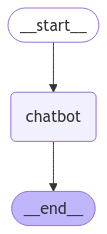

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
input ={"messages":["hey  my name is ashu"]}

In [23]:
app.invoke(input)

{'messages': [HumanMessage(content='hey  my name is ashu', additional_kwargs={}, response_metadata={}, id='daf73a5d-27c5-4aa4-9e5f-fde3a02d9bb6'),
  AIMessage(content="Hi Ashu, it's nice to meet you!", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-0b6ae242-a4f1-4e65-82c2-bfa47b1b4d4b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_read': 0}})]}

In [24]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hello Ashu, it's nice to meet you. My name is Gemini, and I'm here to help you with any questions you may have.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-9e313526-29b9-4f55-a3df-d917824e19f8-0', usage_metadata={'input_tokens': 8, 'output_tokens': 32, 'total_tokens': 40, 'input_token_details': {'cache_read': 0}})]}




In [27]:
@tool
def search(query:str):
    """This is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and Foggy"
    return "It's 90 degrees and sunny"

In [28]:
search.invoke("what is temperature in sf ?")

"It's 60 degrees and Foggy"

In [29]:
search.invoke("what is temperature in india ?")

"It's 90 degrees and sunny"

In [30]:
search

StructuredTool(name='search', description='This is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027106B32430>)

In [31]:
tools=[search]


In [32]:
tool_node=ToolNode(tools)

In [33]:
llm_with_tool=llm.bind_tools(tools)

In [34]:
def call_model(state: MessagesState):
    messages=state['messages']
    response=llm_with_tool.invoke(messages)
    return {"messages":[response]}

In [35]:
response=call_model({"messages":["Hi how are you?"]})
response

{'messages': [AIMessage(content="I am a large language model, I don't have feelings. How can I help you?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-aea2b1a4-1fe7-4ee8-9a58-251d25c572f7-0', usage_metadata={'input_tokens': 42, 'output_tokens': 20, 'total_tokens': 62, 'input_token_details': {'cache_read': 0}})]}

In [38]:
message=response['messages']
message

[AIMessage(content="I am a large language model, I don't have feelings. How can I help you?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-aea2b1a4-1fe7-4ee8-9a58-251d25c572f7-0', usage_metadata={'input_tokens': 42, 'output_tokens': 20, 'total_tokens': 62, 'input_token_details': {'cache_read': 0}})]

In [39]:
last_message=message[-1]
last_message

AIMessage(content="I am a large language model, I don't have feelings. How can I help you?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-aea2b1a4-1fe7-4ee8-9a58-251d25c572f7-0', usage_metadata={'input_tokens': 42, 'output_tokens': 20, 'total_tokens': 62, 'input_token_details': {'cache_read': 0}})

In [41]:
last_message.tool_calls

[]

In [42]:
response=call_model({"messages":["What is weather in India?"]})
response

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "What is weather in India?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-8c61050a-414d-4a57-a700-974a5538f562-0', tool_calls=[{'name': 'search', 'args': {'query': 'What is weather in India?'}, 'id': '3a10173b-bbcd-46a9-96d3-d79054b8d713', 'type': 'tool_call'}], usage_metadata={'input_tokens': 43, 'output_tokens': 18, 'total_tokens': 61, 'input_token_details': {'cache_read': 0}})]}

In [43]:
message=response['messages']
message

[AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "What is weather in India?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-8c61050a-414d-4a57-a700-974a5538f562-0', tool_calls=[{'name': 'search', 'args': {'query': 'What is weather in India?'}, 'id': '3a10173b-bbcd-46a9-96d3-d79054b8d713', 'type': 'tool_call'}], usage_metadata={'input_tokens': 43, 'output_tokens': 18, 'total_tokens': 61, 'input_token_details': {'cache_read': 0}})]

In [44]:
last_message=message[-1]
last_message

AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "What is weather in India?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-8c61050a-414d-4a57-a700-974a5538f562-0', tool_calls=[{'name': 'search', 'args': {'query': 'What is weather in India?'}, 'id': '3a10173b-bbcd-46a9-96d3-d79054b8d713', 'type': 'tool_call'}], usage_metadata={'input_tokens': 43, 'output_tokens': 18, 'total_tokens': 61, 'input_token_details': {'cache_read': 0}})

In [45]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'What is weather in India?'},
  'id': '3a10173b-bbcd-46a9-96d3-d79054b8d713',
  'type': 'tool_call'}]

In [46]:
def router_function(state: MessagesState) -> Literal['tools',END]:
    message=state['messages']
    last_message=message[-1]
    if last_message.tool_calls:
        return 'tools'
    return END

In [47]:
## DEFINE NEW GRAPH
workflow=StateGraph(MessagesState)

workflow.add_node("agent",call_model)
workflow.add_node("tools",tool_node)

workflow.add_edge(START,"agent")

workflow.add_conditional_edges("agent",router_function,{"tools":"tools",END: END})

app=workflow.compile()

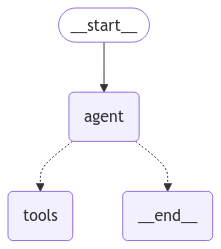

In [48]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [49]:
app.invoke({"messages":['Hi how are you ?']})

{'messages': [HumanMessage(content='Hi how are you ?', additional_kwargs={}, response_metadata={}, id='a3dc15d0-af77-42ce-a946-def98abad426'),
  AIMessage(content='I am doing fine. How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-fd7191f2-42f8-40a5-8499-65a1b8af79f1-0', usage_metadata={'input_tokens': 42, 'output_tokens': 12, 'total_tokens': 54, 'input_token_details': {'cache_read': 0}})]}

In [50]:
app.invoke({"messages":['what is weather in india?']})

{'messages': [HumanMessage(content='what is weather in india?', additional_kwargs={}, response_metadata={}, id='cff658a4-2aca-43c8-83de-6b850f340151'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in india"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-1d7ba191-beb4-4864-a7e7-5be7c537383a-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in india'}, 'id': '347f35f5-0a2c-40ac-a4e3-0d41b6571b91', 'type': 'tool_call'}], usage_metadata={'input_tokens': 43,

In [51]:
workflow.add_edge("tools","agent")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [52]:
app=workflow.compile()

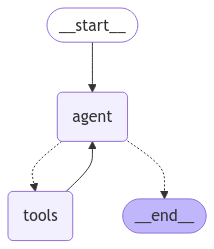

In [53]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
input={"messages":['what is weather in sf?']}

In [55]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from agent Node
_______
{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in sf"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-369ac956-ce65-43b9-9152-f050c6a5e562-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'cc70806b-fc4b-422b-91cd-f3f128e26133', 'type': 'tool_call'}], usage_metadata={'input_tokens': 43, 'output_tokens': 15, 'total_tokens': 58, 'input_token_details': {'cache_read': 0}})]}


Output from tools Node
___

In [56]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [57]:
# Define new Graph
workflow=StateGraph(MessagesState)

workflow.add_node("agent",call_model)

workflow.add_node("tools",tool_node)

workflow.add_edge(START,"agent")

workflow.add_conditional_edges("agent",router_function,{"tools":"tools",END:END})

workflow.add_edge("tools","agent")

app=workflow.compile(checkpointer=memory)

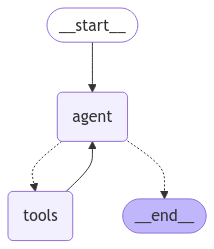

In [58]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [66]:
config={"configurable":{"thread_id":"1"}}

In [67]:
events=app.stream({"messages":['hi there my name is ASHU']},config,stream_mode="values")
events

<generator object Pregel.stream at 0x0000027106F0A660>

In [68]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

hi there my name is ASHU
================================== Ai Message ==================================

Hello, Ashu. What can I do for you today?


In [69]:
events=app.stream({"messages":['can you tell what is my name']},config,stream_mode="values")

In [70]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell what is my name
================================== Ai Message ==================================

You are Ashu.


In [71]:
memory.get(config)

{'v': 1,
 'ts': '2024-11-27T08:34:05.724221+00:00',
 'id': '1efac9a5-d03b-6e6b-800d-b3e459068b17',
 'channel_values': {'messages': [HumanMessage(content='hi there my name is sunny', additional_kwargs={}, response_metadata={}, id='9c9ae2d1-b4c8-4df7-82f9-dc2ff226e0ed'),
   AIMessage(content='Hello, Sunny. What can I do for you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-47f2d7bb-4f8d-49c1-be52-484f3587a985-0', usage_metadata={'input_tokens': 43, 'output_tokens': 12, 'total_tokens': 55, 'input_token_deta